# Etude d'un laminé linéaire

In [1]:
import numpy as np
#%matplotlib qt5 # décommenter pour avoir des figures interactives
import matplotlib.pyplot as plt
#plt.ion() # décommenter pour avoir des figures interactives

## 1) Tracé des perméabilités homogénéisées

Dans un laminé de rang 1 **linéaire**, les perméabilités dans les axes $d$ et $q$ s'écrivent:

$$\left \{ \begin{array}{ccl}
\mu^*_d & = & \rho \mu_{fer} + (1-\rho) \mu_0 \\
\mu^*_q & = & \left ( \dfrac{\rho}{\mu_{fer}} + \dfrac{1-\rho}{\mu_0} \right )^{-1}
\end{array} \right.$$

## a) selon $\mu_{fer}$, à $\rho$ fixé
L'inégalité arithmético-harmonique indique que pour un problème linéaire, on a toujours :
$$ \quad \quad \mu_d^* \geq \mu_q^*$$

On peut faire une analogie avec des résistances : la résistance d'un assemblage série est toujours plus élevée que celle d'un assemblage parallèle.

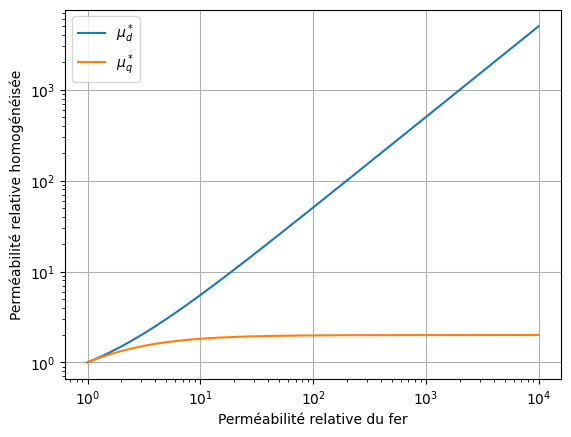

In [2]:
rho = 0.5  # fraction volumique à faire varier

# Tracé des perméabilité homogénéisées

mur = np.logspace(0.001,4,1000)
murd = rho * mur + (1-rho)*1
murq = 1/(rho/mur + (1-rho))

plt.loglog(mur, murd, label = '$\mu_d^*$')
plt.loglog(mur, murq, label = '$\mu_q^*$')
plt.xlabel('Perméabilité relative du fer')
plt.ylabel('Perméabilité relative homogénéisée')
plt.grid()
plt.legend()

## b) selon $\rho$, à $\mu_{fer}$ fixé

In [3]:
mu0 = 4e-7 * np.pi
mu_fer = 1000 * mu0

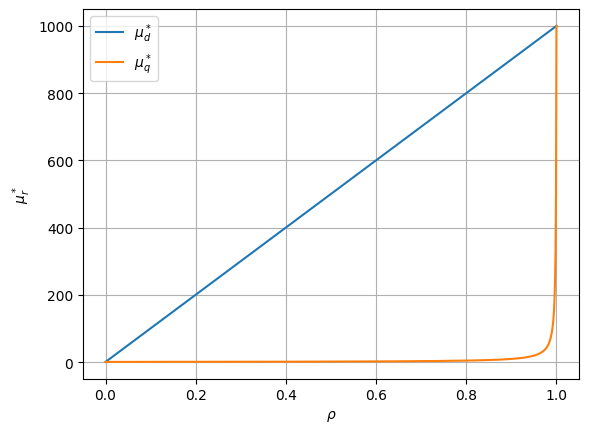

In [4]:
# Tracé des perméabilités

rho = np.linspace(0,1,1000)
mud = rho * mu_fer + (1-rho)*mu0
muq = 1/(rho/mu_fer + (1-rho)/mu0)

plt.plot(rho, mud/mu0, label = '$\mu_d^*$')
plt.plot(rho, muq/mu0, label = '$\mu_q^*$')
plt.xlabel('$\\rho$')
plt.ylabel('$\mu_r^*$')
plt.grid()
plt.legend()

Ces valeurs de perméabilité permettent de calculer les valeurs de compliances homogénéisées $J_d^*$ et $J_q^*$ en fonction de la fraction volumique $\rho$. On constate qu'il existe une valeur de $\rho$ optimale pour la fonction objectif $f^*$:

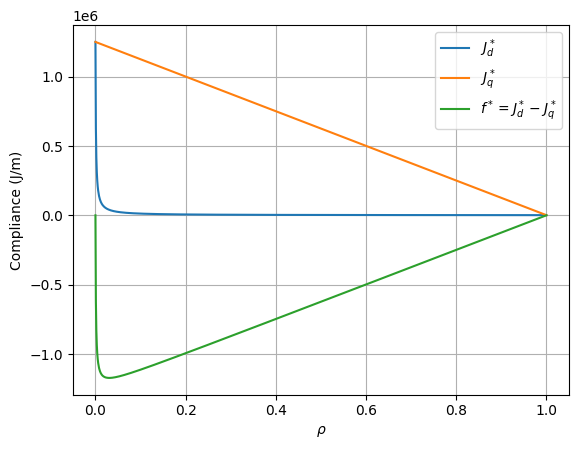

In [5]:
# Tracé des compliances

Jd = 1/2 * np.pi * 1/mud
Jq = 1/2 * np.pi * 1/muq
f = Jd - Jq

plt.plot(rho, Jd, label = '$J_d^*$')
plt.plot(rho, Jq, label = '$J_q^*$')
plt.plot(rho, f, label = '$f^* = J_d^* - J_q^*$')
plt.xlabel('$\\rho$')
plt.ylabel('Compliance (J/m)')
plt.grid(); plt.legend()
plt.show()

## 2) Tracé de la fraction volumique optimale
La valeur optimale de $\rho$ peut se calculer simplement par annulation de la dérivée de $f^*$ en fonction de la perméabilité relative du fer $\mu_r$ et vaut :
$$ \rho_{opt} = \frac{1}{\sqrt{\mu_r}+1} $$

Cette valeur est strictement décroissante, ce qui souligne l'importance de la minimisation de $\mu^*_q$ pour la maximisation du couple à flux fixé.

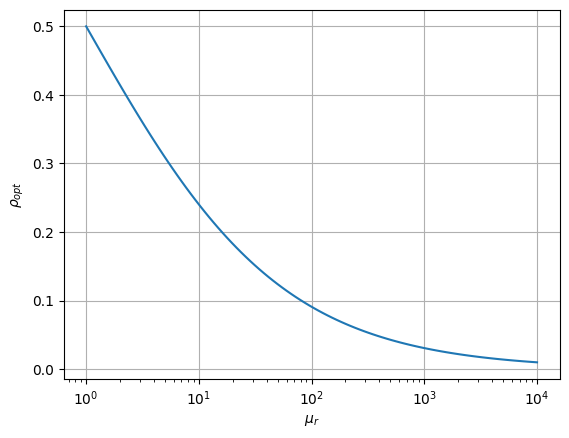

In [6]:
mur = np.logspace(0.001,4,100)
rho_opt = 1/(np.sqrt(mur)+1)

plt.semilogx(mur,rho_opt)
plt.xlabel('$\mu_r$')
plt.ylabel('$\\rho_{opt}$')
plt.grid()
plt.show()

## 3) Tracé des compliances optimales

Comme on connaît les valeurs de $\mu_d^*$ et $\mu_q^*$, et qu'on sait calculer la fraction volumique optimale, on peut tracer les valeurs optimales de compliances homogénéisées pour minimiser $f^*$ en fonction de $\mu_r$.

Là encore, on retrouve un résultat intuitif avec la décroissance stricte de $f^*$ : plus la perméabilité du fer est importante, plus on pourra produire de couple. 

On remarque que $J_{q-opt}^*>$ montre qu'il existe deux stratégies distinctes pour minimiser $f^*$, selon la valeur de $\mu_r$ :
- Pour les basses perméabilités : $\mu_r < 4$, les valeurs de $J_d^*$ et $J_q^*$ sont proches, il faut donc 
- Pour les perméabilités plus importantes : $\mu_r > 4$, il faut privilégier la minimisation de $\mu_q^*$ car la valeur de $J^*_q$ est alors clairement plus importante que celle de $J^*_d$

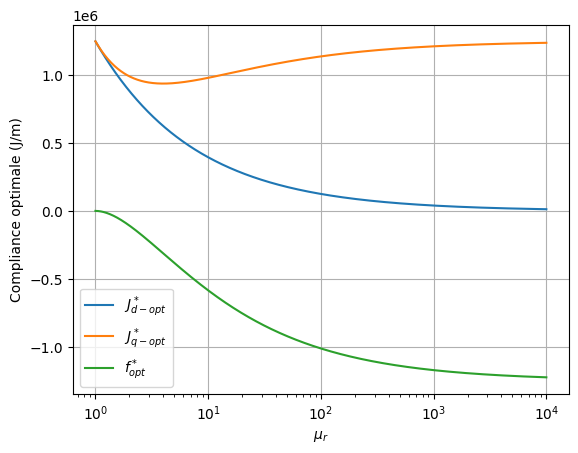

In [7]:
mur = np.logspace(0.001,4,1000)
rho_opt = 1/(np.sqrt(mur)+1)
mud_opt = rho_opt * mur*mu0 + (1-rho_opt)*mu0
muq_opt = 1/(rho_opt/( mur*mu0) + (1-rho_opt)/mu0)

Jdopt = 1/2 * np.pi * 1/mud_opt
Jqopt = 1/2 * np.pi * 1/muq_opt
fopt = Jdopt - Jqopt

plt.semilogx(mur, Jdopt, label = '$J_{d-opt}^*$')
plt.semilogx(mur, Jqopt, label = '$J_{q-opt}^*$')
plt.semilogx(mur, fopt, label = '$f^*_{opt} $')
plt.xlabel('$\mu_r$')
plt.ylabel('Compliance optimale (J/m)')
plt.grid() ; plt.legend(); plt.show()